### 1) Delivery_time -> Predict delivery time using sorting time

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
time_data = pd.read_csv("delivery_time.csv")
time_data.columns= ["Delivery_Time","Sorting_Time"]
# time_data.set_index(keys="Delivery_Time",inplace = True)
time_data.head(5)

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


#### Checking if data is linear

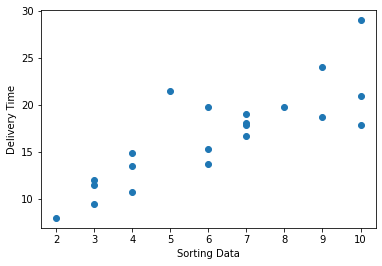

In [3]:
plt.scatter(x=time_data.Sorting_Time,y=time_data.Delivery_Time)
plt.xlabel("Sorting Data")
plt.ylabel("Delivery Time")
plt.show()


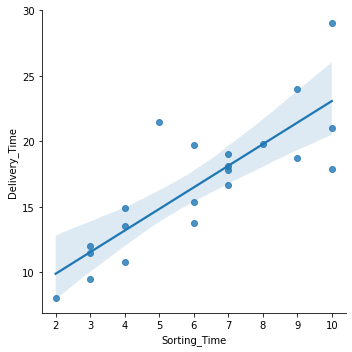

In [4]:
sns.lmplot(x="Sorting_Time",y="Delivery_Time",data=time_data)

### checking if data is normally distributed

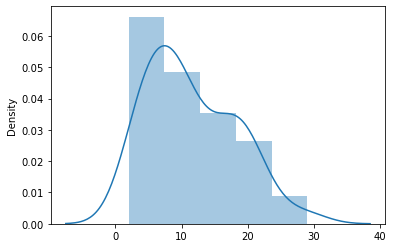

In [5]:
sns.distplot(time_data)
plt.show()

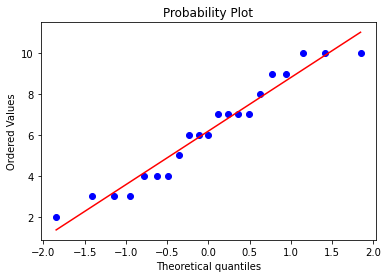

In [6]:
stats.probplot(x=time_data["Sorting_Time"],plot=plt)
plt.show()

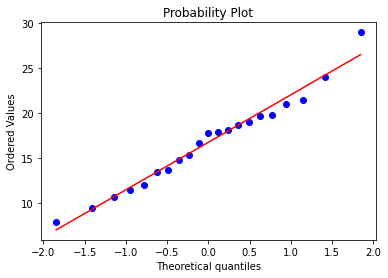

In [7]:
stats.probplot(x=time_data["Delivery_Time"],plot=plt)
plt.show()

In [8]:
time_data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


###  Model building

In [9]:
import statsmodels.formula.api as smf

In [10]:
model1 = smf.ols("Delivery_Time~Sorting_Time",data=time_data).fit()
model1.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [12]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 24 May 2022   Prob (F-statistic):           3.98e-06
Time:                        23:11:16   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Since 1st model's  RSquare is not satisfactory..we need to improve our model.

In [13]:
model2 = smf.ols("Delivery_Time~np.log(Sorting_Time)",data=time_data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 24 May 2022   Prob (F-statistic):           2.64e-06
Time:                        23:11:21   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### didnot improve much

In [14]:
model3 = smf.ols("np.log(Delivery_Time)~Sorting_Time",data=time_data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 24 May 2022   Prob (F-statistic):           2.64e-06
Time:                        23:11:27   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
time_data["Squared_X"] = time_data.Sorting_Time ** 2

In [16]:
model4 = smf.ols("np.log(Delivery_Time)~Sorting_Time + Squared_X", data=time_data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 24 May 2022   Prob (F-statistic):           2.64e-06
Time:                        23:11:36   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### RSquare is not improving for any of the model so we can stop here.

### Predict for new data

In [17]:
newdata=pd.Series([30,40])
data_predict=pd.DataFrame(newdata,columns = ['Sorting_Time'])
data_predict


,Sorting_Time
0,30
1,40


In [18]:
model3.predict(data_predict)

0    5.287920
1    6.343436
dtype: float64

## 2) Salary_hike -> Build a prediction model for Salary_hike

In [19]:
salary_data = pd.read_csv("Salary_Data.csv")
salary_data.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [20]:
salary_data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

#### Checking correlation of features

In [21]:
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


#### checking Linearity

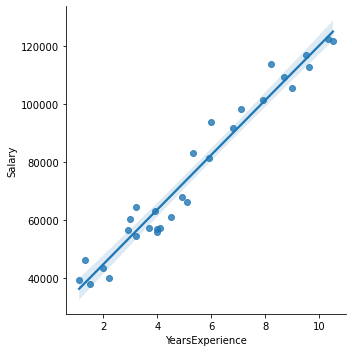

In [22]:
sns.lmplot(x="YearsExperience",
    y="Salary",
    data=salary_data)

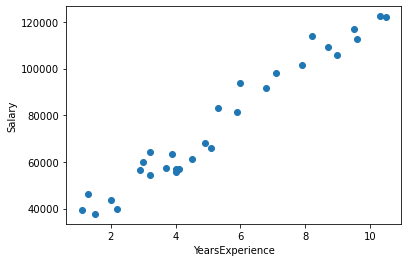

In [35]:
plt.scatter(x=salary_data.YearsExperience,y=salary_data.Salary)
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

#### Normality Test

<AxesSubplot:ylabel='Density'>

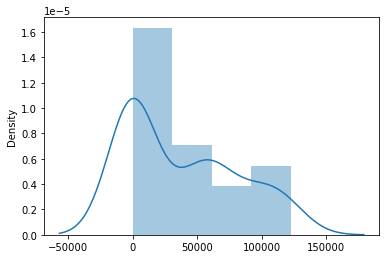

In [23]:
sns.distplot(salary_data)

In [24]:
salary_data.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

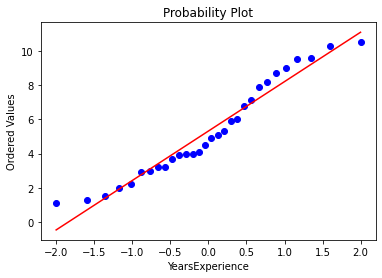

In [25]:
stats.probplot(salary_data["YearsExperience"],plot = plt)
plt.xlabel("YearsExperience")
plt.show()

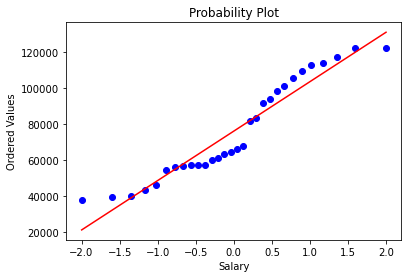

In [26]:
stats.probplot(salary_data["Salary"],plot = plt)
plt.xlabel("Salary")
plt.show()

#### Model Building for predicting Salary

In [27]:
import statsmodels.formula.api as smf

In [28]:
model = smf.ols("Salary~YearsExperience",data=salary_data).fit()

In [29]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 24 May 2022   Prob (F-statistic):           1.14e-20
Time:                        23:12:27   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### This model is having 95% Accuracy. So we can stop here.

### Predicting for new data

In [31]:
test_data = [3.5,4.8,10.5]

In [32]:
pred_data = pd.DataFrame(test_data,columns=["YearsExperience"])
pred_data

,YearsExperience
0,3.5
1,4.8
2,10.5


In [33]:
pred_data = model.predict(pred_data)
pred_data

0     58867.068324
1     71152.019342
2    125016.804574
dtype: float64